## Importing libraries

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading and Analyzing Dataset

In [298]:
!pip install opendatasets --upgrade

In [299]:
import opendatasets as od

In [300]:
dataset_link = 'https://www.kaggle.com/competitions/titanic'
od.download(dataset_link)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [301]:
submission_path = '/content/titanic/gender_submission.csv'
test_path = '/content/titanic/test.csv'
train_path = '/content/titanic/train.csv'

In [302]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

In [303]:
train_df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [304]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [305]:
test_df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [306]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [307]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [308]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [309]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Age, Cabin and Embarked have null values in it

## EDA

### Univariate Analysis

In [311]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='count'>

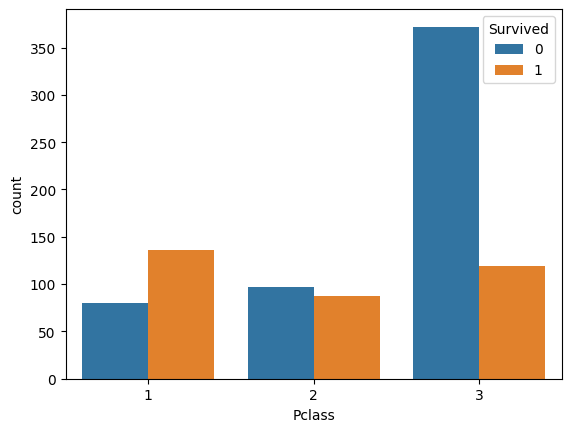

In [312]:
sns.countplot(x='Pclass', data=train_df, hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

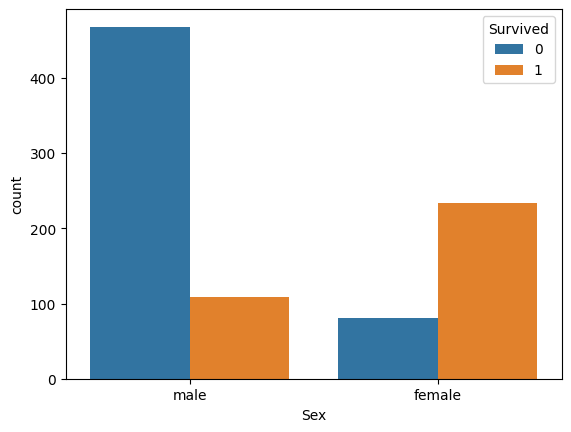

In [313]:
sns.countplot(x='Sex', data=train_df, hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

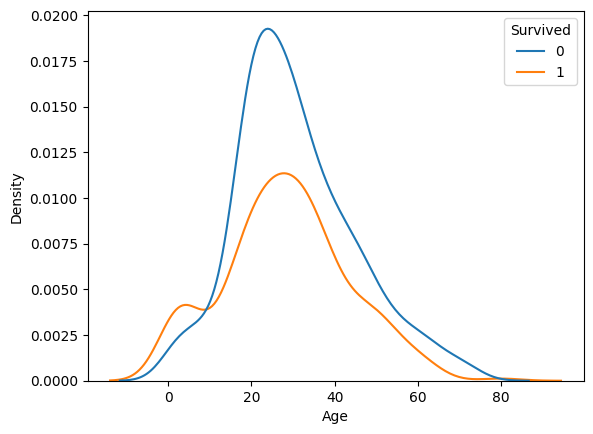

In [314]:
sns.kdeplot(x='Age', data=train_df, hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

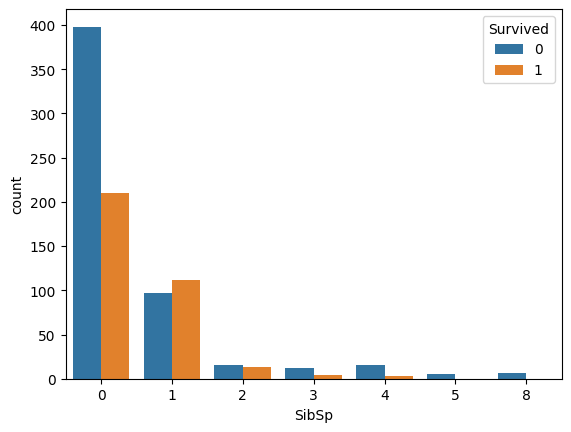

In [315]:
sns.countplot(x='SibSp', data=train_df, hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

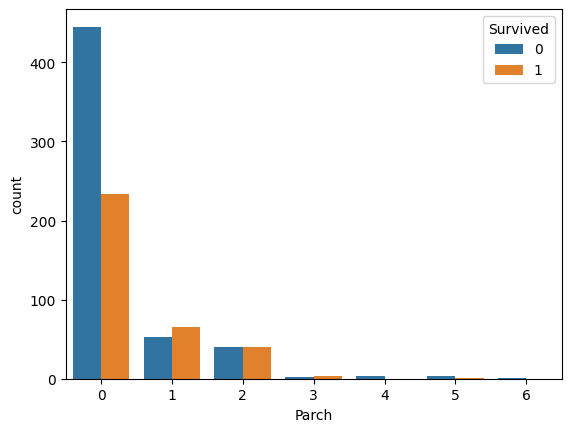

In [316]:
sns.countplot(x='Parch', data=train_df, hue='Survived')

### Applying log on "Fare" to make it normally distributed

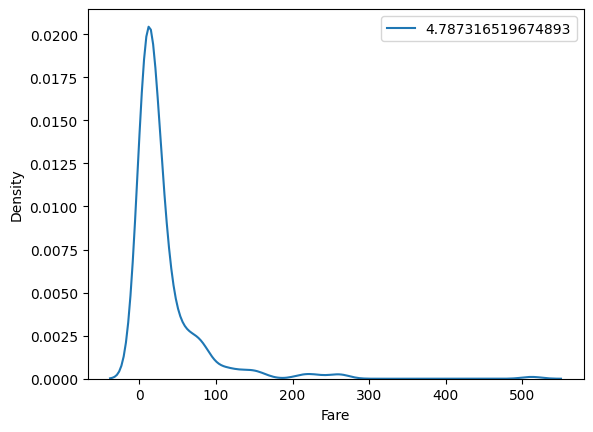

In [317]:
sns.kdeplot(x='Fare', data=train_df, label=f'{train_df.Fare.skew()}')
plt.legend()

In [318]:
train_df['Fare'] = train_df['Fare'].map(lambda i: np.log(i) if i>0 else 0)

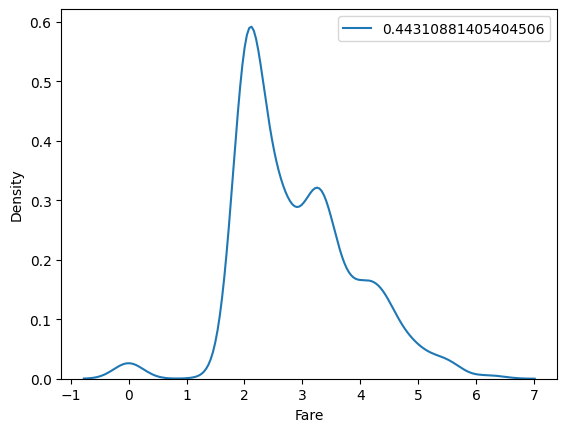

In [319]:
sns.kdeplot(x='Fare', data=train_df, label=f'{train_df.Fare.skew()}')
plt.legend()

<Axes: xlabel='Embarked', ylabel='count'>

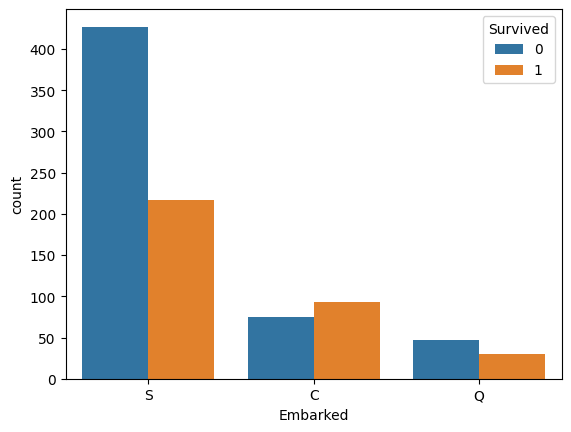

In [320]:
sns.countplot(x='Embarked', data=train_df, hue='Survived')

<Axes: >

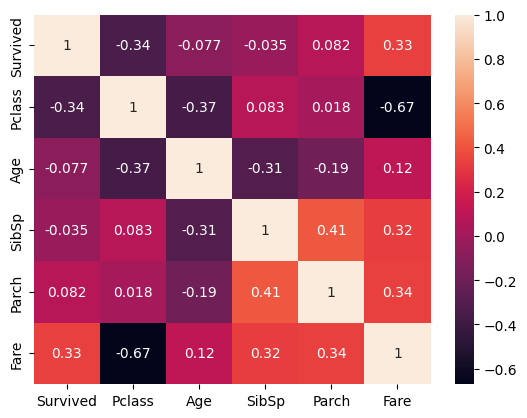

In [321]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=True)

In [322]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Bivariate Analysis

<Axes: xlabel='Sex', ylabel='Pclass'>

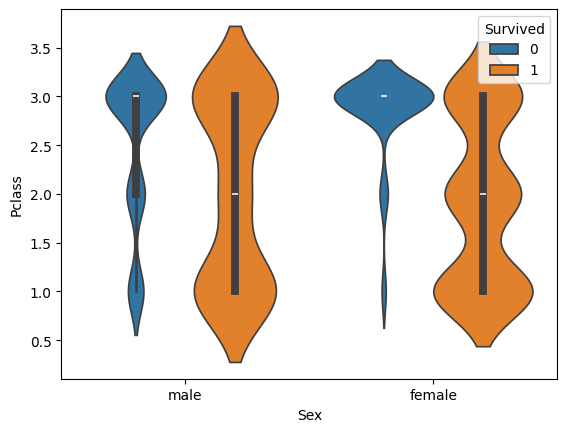

In [323]:
sns.violinplot(x='Sex', y='Pclass', data=train_df, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

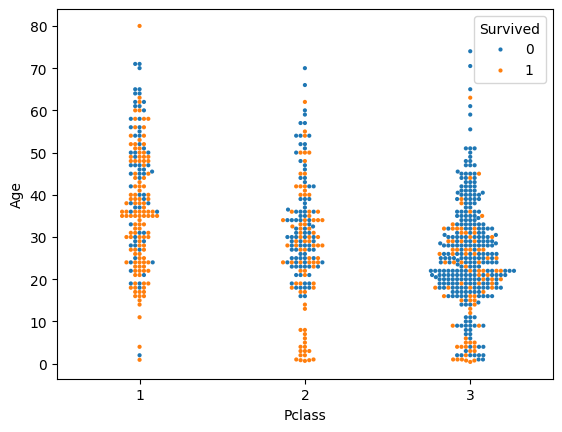

In [324]:
sns.swarmplot(x='Pclass', y='Age', data=train_df, hue='Survived', size=3)

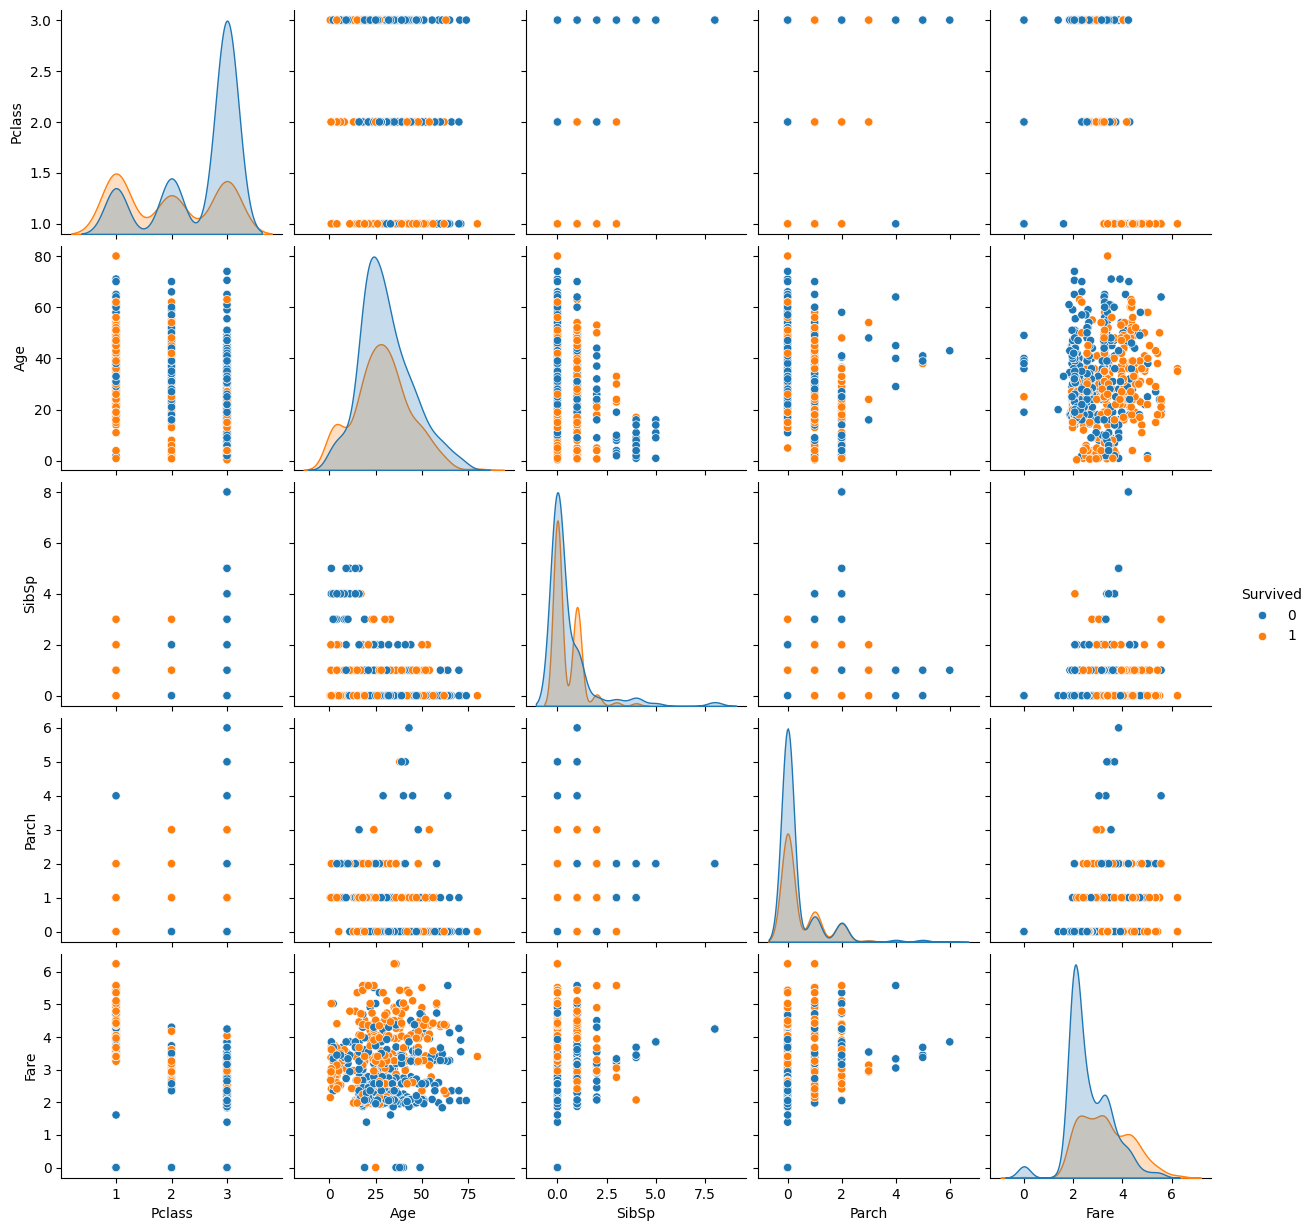

In [325]:
sns.pairplot(train_df, diag_kind='kde', hue='Survived')

### Outliers removal

In [326]:
percentile25 = train_df['Age'].quantile(0.25)
percentile75 = train_df['Age'].quantile(0.75)
percentile25, percentile75

(20.125, 38.0)

In [327]:
iqr = percentile75 - percentile25
iqr

17.875

In [328]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit, lower_limit

(64.8125, -6.6875)

In [329]:
upper_limit.dtype, train_df['Age'].dtype

(dtype('float64'), dtype('float64'))

<Axes: ylabel='Age'>

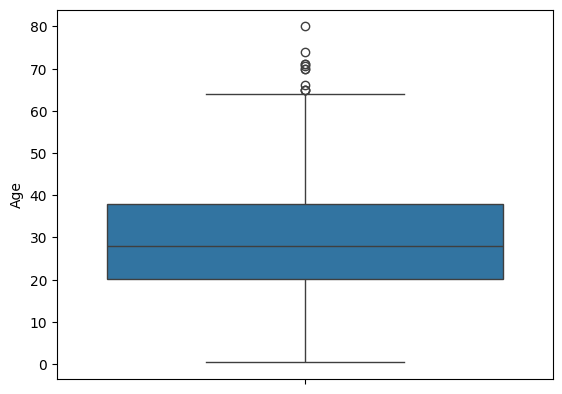

In [330]:
sns.boxplot(train_df['Age'])

In [331]:
train_df[(train_df['Age'] >= upper_limit) | (train_df['Age'] <= lower_limit)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,2.351375,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,4.126799,B30,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,3.545419,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,2.047693,NaN,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,2.047693,NaN,Q
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,3.279030,E38,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,3.902058,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,3.401197,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,2.351375,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,4.262680,B22,S


In [332]:
def trace_outliers(df, col):
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df = df[(df[col] >= upper_limit) | (df[col] <= lower_limit)]
  return df.copy()

def remove_outliers(df, col):
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  outliers = df[(df[col] >= upper_limit) | (df[col] <= lower_limit)]
  df = df.drop(outliers.index)
  return df.copy()

In [333]:
remove_outliers(train_df, 'Fare')
# remove_outliers(train_df, ['Fare'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,2.564949,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,3.401197,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,3.154870,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,3.401197,C148,C


In [334]:
new_df = remove_outliers(train_df, 'Age')
new_df = remove_outliers(new_df, 'Fare')

In [335]:
train_df.shape

(891, 10)

In [336]:
new_df.shape

(854, 10)

In [337]:
new_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
Cabin       668
Embarked      2
dtype: int64

<Axes: ylabel='Age'>

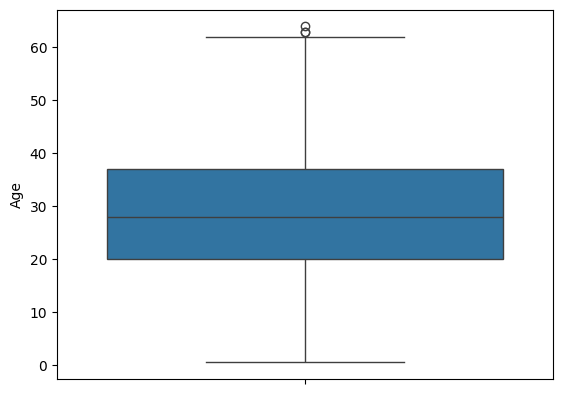

In [338]:
sns.boxplot(new_df['Age'])

### Filling missing value

<Axes: xlabel='Pclass', ylabel='Age'>

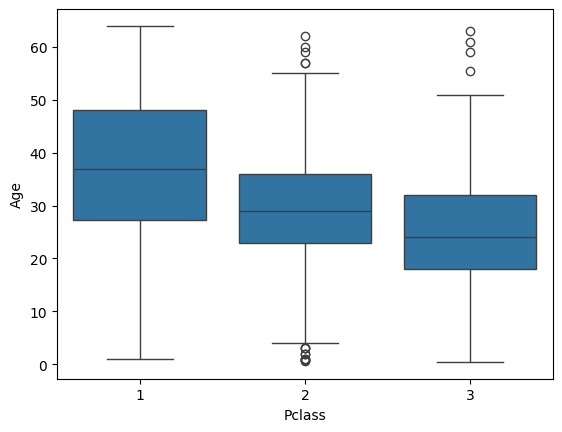

In [339]:
sns.boxplot(x='Pclass', y='Age', data=new_df)

In [340]:
def fill_age(df):
  for pclass in (1, 2, 3):
    for survived in (0, 1):
      mean_age = df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]['Age'].mean()
      df.loc[(df['Pclass'] == pclass) & (df['Survived'] == survived), 'Age'] = \
        df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]['Age'].fillna(mean_age)
  return df.copy()

In [341]:
# def fill_age(df):
#   for pclass in (1, 2, 3):
#       mean_age = df[(df['Pclass'] == pclass)]['Age'].mean()
#       df.loc[df['Pclass'] == pclass, 'Age'] = df.loc[df['Pclass'] == pclass, 'Age'].fillna(mean_age)
#   return df.copy()

In [342]:
new_df = fill_age(new_df)

In [343]:
new_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       668
Embarked      2
dtype: int64

In [344]:
new_df.drop(columns=['Cabin'], inplace=True)

In [345]:
new_df.dropna(subset=['Embarked'], inplace=True)

In [346]:
new_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [347]:
new_df.shape

(852, 9)

## Feature Engineering

#### Family size

In [348]:
new_df['FamilySize'] = new_df['SibSp'] + new_df['Parch'] + 1

In [349]:
new_df['FamilySize'].value_counts()

FamilySize
1     509
2     157
3     101
4      29
6      18
5      13
7      12
11      7
8       6
Name: count, dtype: int64

<Axes: xlabel='FamilySize', ylabel='Density'>

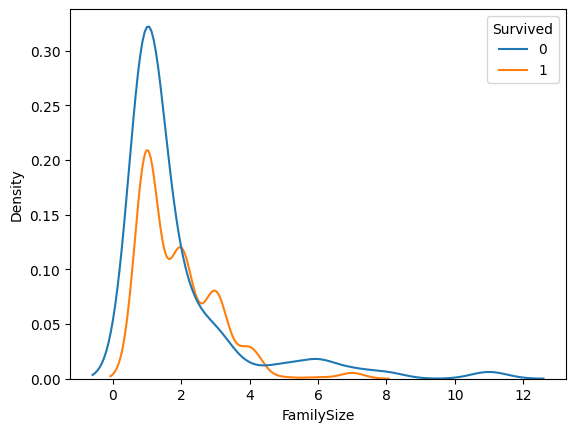

In [350]:
sns.kdeplot(x='FamilySize', hue='Survived', data=new_df)

In [351]:
new_df['single'] = new_df['FamilySize'].map(lambda i: 1 if i==1 else 0)
new_df['small'] = new_df['FamilySize'].map(lambda i: 1 if i == 2 else 0)
new_df['medium'] = new_df['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
new_df['large'] = new_df['FamilySize'].map(lambda i: 1 if i>=5 else 0)

In [352]:
new_df.drop(columns=['FamilySize'], inplace=True)
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,single,small,medium,large
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,1,0,0,0


## Encoding

In [353]:
cat_cols = ['Sex', 'Embarked']

In [354]:
new_df_encoded = pd.get_dummies(new_df, columns=cat_cols, dtype='float32', drop_first=True)

In [355]:
new_df_encoded.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,single,small,medium,large,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,1.981001,0,1,0,0,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,4.266662,0,1,0,0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,2.070022,1,0,0,0,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,3.972177,0,1,0,0,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,2.085672,1,0,0,0,1.0,0.0,1.0


In [356]:
new_df_encoded.drop(columns=['Name'], inplace=True)

In [357]:
new_df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,single,small,medium,large,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,0,1,0,0,1.0,0.0,1.0
1,1,1,38.0,1,0,4.266662,0,1,0,0,0.0,0.0,0.0
2,1,3,26.0,0,0,2.070022,1,0,0,0,0.0,0.0,1.0
3,1,1,35.0,1,0,3.972177,0,1,0,0,0.0,0.0,1.0
4,0,3,35.0,0,0,2.085672,1,0,0,0,1.0,0.0,1.0


## Model Training

### Train these model and check their cross validation score to know which one perform better

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [358]:
RANDOM_STATE = 42

In [359]:
from sklearn.svm import SVC

In [360]:
from sklearn.model_selection import train_test_split, cross_val_score

In [361]:
X_train = new_df_encoded.drop(columns=['Survived'])
y_train = new_df_encoded['Survived']

X_train.shape, y_train.shape

((852, 12), (852,))

In [362]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,single,small,medium,large,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1.981001,0,1,0,0,1.0,0.0,1.0
1,1,38.0,1,0,4.266662,0,1,0,0,0.0,0.0,0.0
2,3,26.0,0,0,2.070022,1,0,0,0,0.0,0.0,1.0
3,1,35.0,1,0,3.972177,0,1,0,0,0.0,0.0,1.0
4,3,35.0,0,0,2.085672,1,0,0,0,1.0,0.0,1.0


In [363]:
new_df_encoded.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
single        0
small         0
medium        0
large         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [364]:
clf = SVC(kernel='linear', C=1, random_state=RANDOM_STATE)
scores = cross_val_score(clf, X_train, y_train, cv=5, error_score='raise')
scores.mean(), scores.std()

(0.8039766081871343, 0.0064016251954402215)

### Models

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [365]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [366]:
classifiers = []

classifiers.append(SVC(random_state=RANDOM_STATE))
classifiers.append(DecisionTreeClassifier(random_state=RANDOM_STATE))
classifiers.append(AdaBoostClassifier(random_state=RANDOM_STATE))
classifiers.append(RandomForestClassifier(random_state=RANDOM_STATE))
classifiers.append(ExtraTreesClassifier(random_state=RANDOM_STATE))
classifiers.append(GradientBoostingClassifier(random_state=RANDOM_STATE))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=RANDOM_STATE))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=RANDOM_STATE))

In [367]:
scores_mean = []
scores_std = []
for classifier in classifiers:
  scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = "accuracy", n_jobs=-1)

  print(f"Classifier: {classifier.__class__.__name__}")
  print(f"Mean: {scores.mean()}")
  print(f"Std: {scores.std()}\n")

  scores_mean.append(scores.mean()), scores_std.append(scores.std())

Classifier: SVC
Mean: 0.6760875512995896
Std: 0.033419544265951596

Classifier: DecisionTreeClassifier
Mean: 0.7959370725034199
Std: 0.0436346931193683

Classifier: AdaBoostClassifier
Mean: 0.8322435020519835
Std: 0.038532347134465676

Classifier: RandomForestClassifier
Mean: 0.8228590971272229
Std: 0.03021134686821346

Classifier: ExtraTreesClassifier
Mean: 0.8087688098495212
Std: 0.03215737260084561

Classifier: GradientBoostingClassifier
Mean: 0.8486456908344735
Std: 0.033582735447600126

Classifier: KNeighborsClassifier
Mean: 0.7946785225718194
Std: 0.034021447777321016

Classifier: LogisticRegression
Mean: 0.8156908344733242
Std: 0.020014951528300212

Classifier: LinearDiscriminantAnalysis
Mean: 0.8145280437756497
Std: 0.025818255734547046

Classifier: XGBClassifier
Mean: 0.8345554035567714
Std: 0.03232516167528768



#### Selecting top model giving accuracy greater than 80% for Ensembling

1. GradientBoostingClassifier
2. XGBClassifier
3. LogisticRegression
4. LinearDiscriminantAnalysis
5. AdaBoostClassifier
6. RandomForestClassifier

### Making first submission using :: VotingEnsembling

In [368]:
from sklearn.ensemble import VotingClassifier

In [369]:
gb_es = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb_es = XGBClassifier(random_state=RANDOM_STATE)
lr_es = LogisticRegression(random_state=RANDOM_STATE)
lda_es = LinearDiscriminantAnalysis()
ada_es = AdaBoostClassifier(random_state=RANDOM_STATE)
rf_es = RandomForestClassifier(random_state=RANDOM_STATE)

clf_estimators= [
    ('gb', gb_es),
    ('xgb', xgb_es),
    ('lr', lr_es),
    ('lda', lda_es),
    ('ada', ada_es),
    ('rf', rf_es)
]

In [370]:
voting_clf = VotingClassifier(estimators=clf_estimators, voting='hard', n_jobs=-1)

In [371]:
voting_score = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, error_score='raise')


In [372]:
voting_score, voting_score.mean()

(array([0.8372093 , 0.8255814 , 0.8       , 0.89411765, 0.85882353,
        0.81176471, 0.87058824, 0.82352941, 0.84705882, 0.83529412]),
 0.8403967168262654)

In [373]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 n_jobs=-1)

In [374]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,single,small,medium,large,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1.981001,0,1,0,0,1.0,0.0,1.0
1,1,38.0,1,0,4.266662,0,1,0,0,0.0,0.0,0.0
2,3,26.0,0,0,2.070022,1,0,0,0,0.0,0.0,1.0
3,1,35.0,1,0,3.972177,0,1,0,0,0.0,0.0,1.0
4,3,35.0,0,0,2.085672,1,0,0,0,1.0,0.0,1.0


In [375]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['single'] = test_df['FamilySize'].map(lambda i: 1 if i==1 else 0)
test_df['small'] = test_df['FamilySize'].map(lambda i: 1 if i == 2 else 0)
test_df['medium'] = test_df['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
test_df['large'] = test_df['FamilySize'].map(lambda i: 1 if i>=5 else 0)
test_df.drop(columns=['FamilySize'], inplace=True)

test_df = pd.get_dummies(test_df, columns=cat_cols, dtype='float32', drop_first=True)

In [376]:
test_df = test_df.drop(columns=['Name', 'Cabin'])

In [377]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,single,small,medium,large,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,0,0,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0,1,0,0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1,0,0,0,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1,0,0,0,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0,0,1,0,0.0,0.0,1.0


In [378]:
test_df.shape

(418, 12)

In [379]:
test_df.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
single         0
small          0
medium         0
large          0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [380]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [381]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [382]:
test_pred = voting_clf.predict(test_df)
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [383]:
submission_df['Survived'] = test_pred

In [384]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [385]:
submission_df.to_csv('gender_submission.csv', index=False)

In [386]:
gb_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [387]:
test_pred_gb = gb_clf.predict(test_df)
submission_df['Survived'] = test_pred_gb
submission_df.to_csv('gender_submission_gb.csv', index=False)

When **Age** of test_df is imputed with **median**
- Gradient Boosting alone giving better result than the Emsembled model
- GB score in test = 0.77751 (Rank around 4200)
- Ensembling Model score in test = 0.77033 (Rank around 10700)

When **Age** of test_df is imputed with **mean**
- Gradient Boosting alone giving better result than the Emsembled model
- GB score in test = 0.0.77511
- Ensembling Model score in test = 0.77990 (Rank 3403 (out of 17180) == top 20%) --> ***BEST TILL NOW***

Date = 02-07-2024

### Hyperparameter Tuning of top Models using :: GridSearchCV

In [388]:
from sklearn.model_selection import GridSearchCV

#### GradientBoostingClassifier

> Remaining works
- Fine Tune some of the model to give best result
- Use these fine tuned model for Ensmeble learning